In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [133]:
df = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/synthetic_coffee_health.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

In [134]:
df.describe()

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000
mean,5000.50000,34.949100,2.509230,238.411010,6.636220,23.986860,70.617800,7.48704,0.20040,0.300700
std,2886.89568,11.160939,1.450248,137.748815,1.222055,3.906411,9.822951,4.31518,0.40032,0.458585
min,1.00000,18.000000,0.000000,0.000000,3.000000,15.000000,50.000000,0.00000,0.00000,0.000000
25%,2500.75000,26.000000,1.500000,138.750000,5.800000,21.300000,64.000000,3.70000,0.00000,0.000000
50%,5000.50000,34.000000,2.500000,235.400000,6.600000,24.000000,71.000000,7.50000,0.00000,0.000000
75%,7500.25000,43.000000,3.500000,332.025000,7.500000,26.600000,77.000000,11.20000,0.00000,1.000000
max,10000.00000,80.000000,8.200000,780.300000,10.000000,38.200000,109.000000,15.00000,1.00000,1.000000


In [135]:
df.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [136]:
if 'ID' in df.columns:
    df.drop('ID', axis=1, inplace=True)
df.head()


,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [137]:
# Handling missing value Target
df['Health_Issues'].fillna('None', inplace=True)



/tmp/ipython-input-133050407.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Health_Issues'].fillna('None', inplace=True)


In [138]:
# Handling missing value Numerik
num_cols = df.select_dtypes(include=['float64','int64']).columns
num_cols = [c for c in num_cols if c != 'Health_Issues']
for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)


/tmp/ipython-input-1248859921.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [139]:
# Handling missing value kategori
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols = [c for c in cat_cols if c != 'Health_Issues']
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

df.isnull().sum()



/tmp/ipython-input-3942347415.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


,0
Age,0
Gender,0
Country,0
Coffee_Intake,0
Caffeine_mg,0
Sleep_Hours,0
Sleep_Quality,0
BMI,0
Heart_Rate,0
Stress_Level,0


In [140]:
# Encode Kategori
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cat_encode = ['Gender','Country','Sleep_Quality','Stress_Level','Occupation','Health_Issues']
for col in cat_encode:
    df[col] = le.fit_transform(df[col])

df.head()



,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,40,1,7,3.5,328.1,7.5,2,24.9,78,1,14.5,2,2,0,0
1,33,1,7,1.0,94.1,6.2,2,20.0,67,1,11.0,2,3,0,0
2,42,1,2,5.3,503.7,5.9,1,22.7,59,2,11.2,0,1,0,0
3,53,1,7,2.6,249.2,7.3,2,24.7,71,1,6.6,0,2,0,0
4,32,0,15,3.1,298.0,5.3,1,24.1,76,2,8.5,0,4,0,1


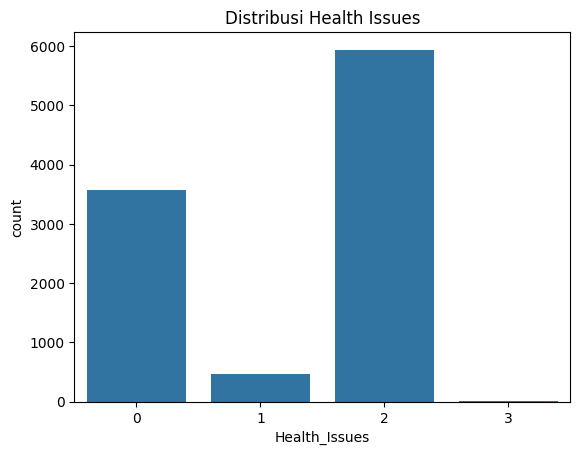

In [141]:
# Exploratory Data Analysis – Distribusi Target
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Health_Issues', data=df)
plt.title("Distribusi Health Issues")
plt.show()



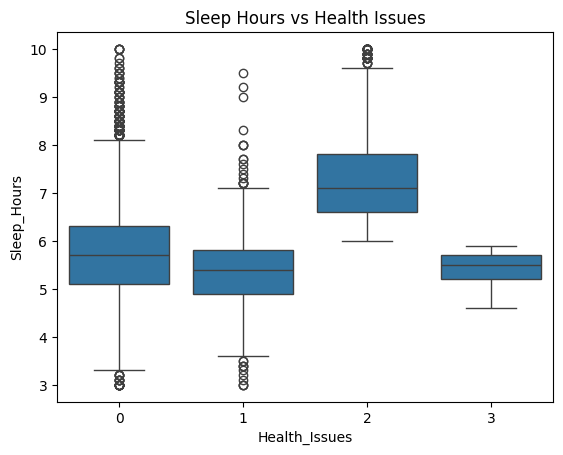

In [142]:
# Exploratory Data Analysis – Sleep vs Health Issues
sns.boxplot(x='Health_Issues', y='Sleep_Hours', data=df)
plt.title("Sleep Hours vs Health Issues")
plt.show()



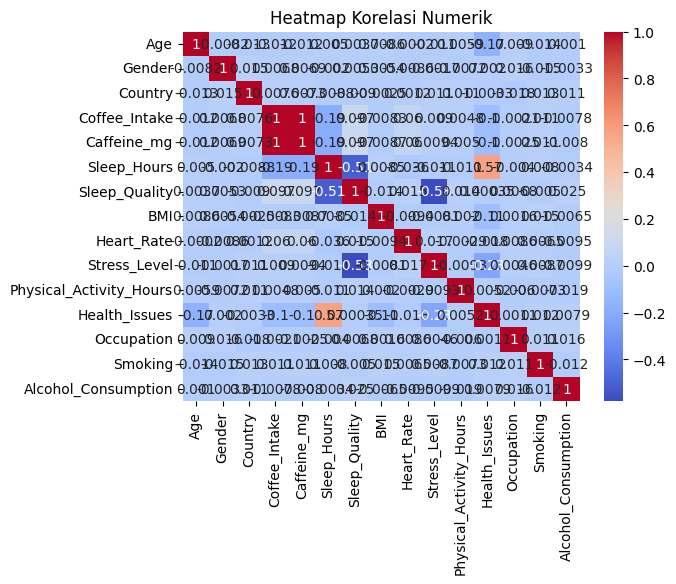

In [143]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi Numerik")
plt.show()


In [144]:
# Split data
from sklearn.model_selection import train_test_split

X = df.drop('Health_Issues', axis=1)
y = df['Health_Issues']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [145]:
# Decision Tree – Entropy
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train, y_train)

acc_entropy = accuracy_score(y_test, dt_entropy.predict(X_test))
print("Accuracy Decision Tree (Entropy):", acc_entropy)


Accuracy Decision Tree (Entropy): 0.9965


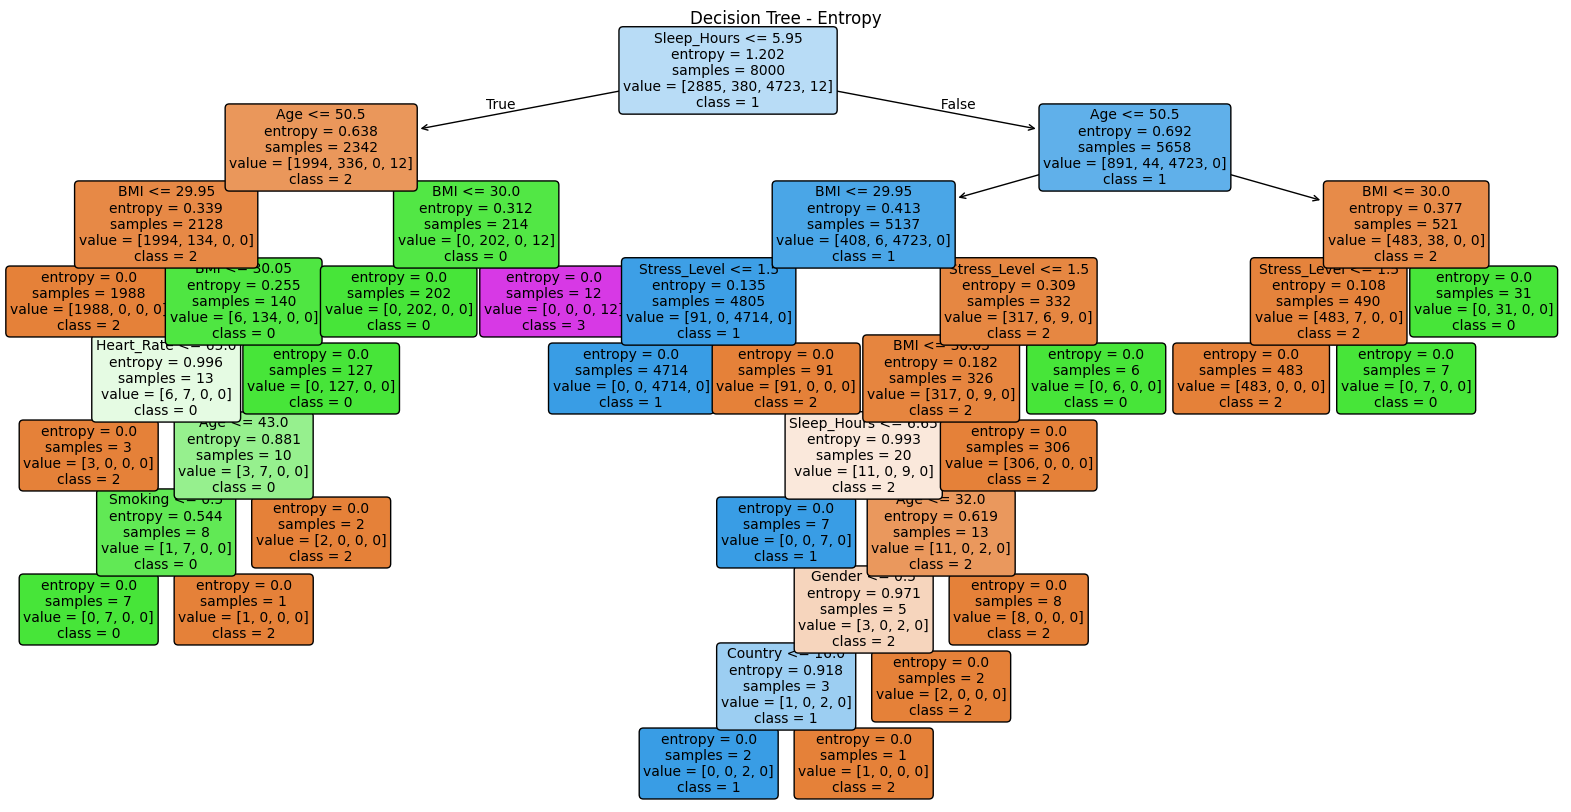

In [146]:
# Visualize Decision Tree – Entropy
from sklearn import tree

plt.figure(figsize=(20,10))
tree.plot_tree(
    dt_entropy,
    feature_names=X.columns,
    class_names=[str(c) for c in y.unique()],
    filled=True, rounded=True, fontsize=10
)
plt.title("Decision Tree - Entropy")
plt.show()


In [147]:
# Decision Tree – Gini
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train, y_train)

acc_gini = accuracy_score(y_test, dt_gini.predict(X_test))
print("Accuracy Decision Tree (Gini):", acc_gini)


Accuracy Decision Tree (Gini): 0.9975


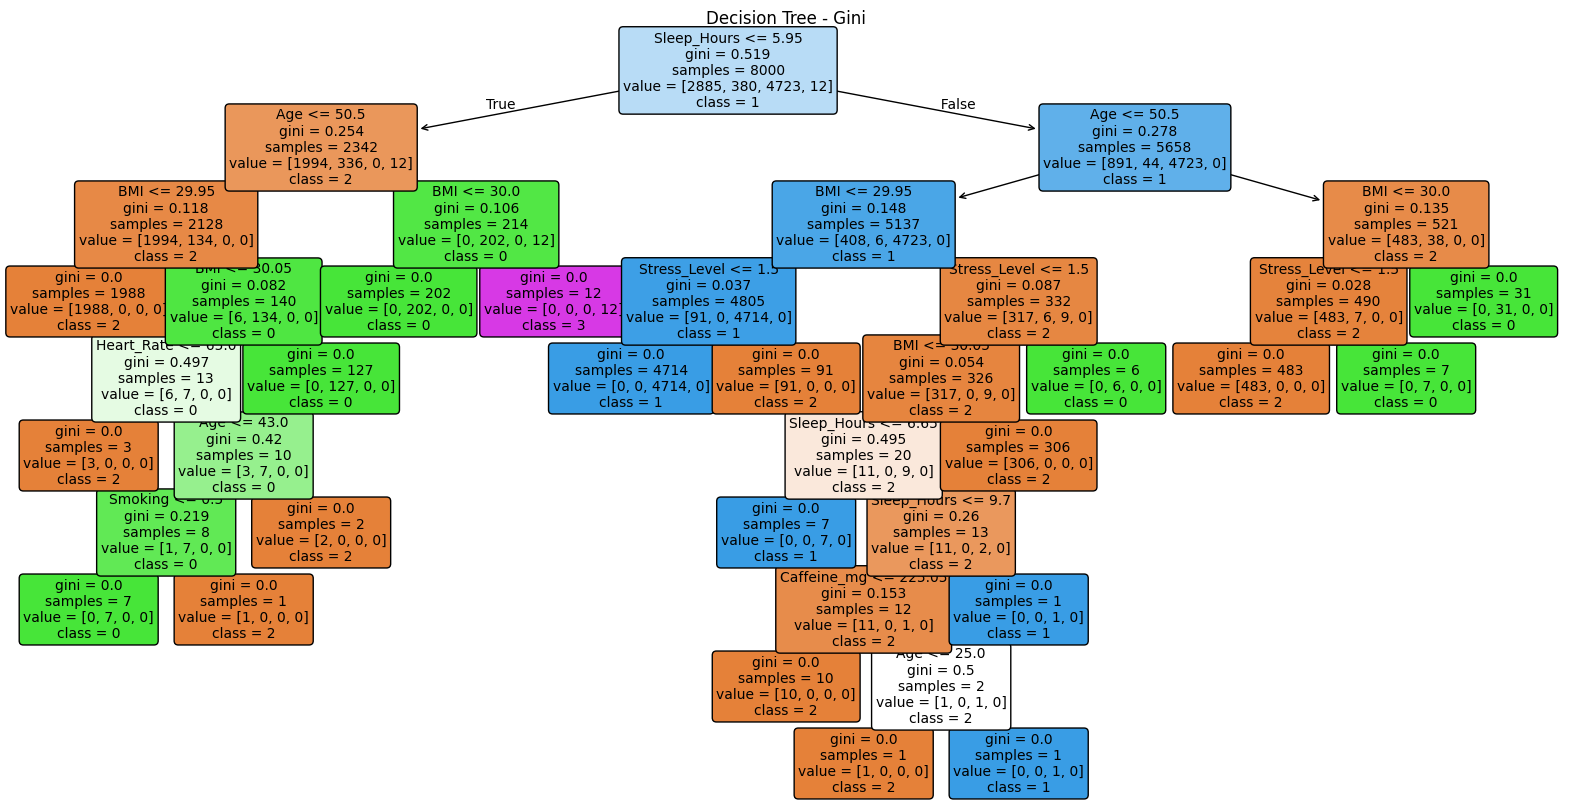

In [148]:
# Visualize Decision Tree – Gini
plt.figure(figsize=(20,10))
tree.plot_tree(
    dt_gini,
    feature_names=X.columns,
    class_names=[str(c) for c in y.unique()],
    filled=True, rounded=True, fontsize=10
)
plt.title("Decision Tree - Gini")
plt.show()


In [149]:
# Naïve Bayes
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

acc_nb = accuracy_score(y_test, nb.predict(X_test))
print("Accuracy Naive Bayes:", acc_nb)


Accuracy Naive Bayes: 0.854


In [150]:
new_data = pd.DataFrame([{
    'Age':28,
    'Gender':'Male',
    'Country':'Brazil',
    'Coffee_Intake':3,
    'Caffeine_mg':280,
    'Sleep_Hours':5,
    'Sleep_Quality':'Poor',
    'BMI':25.4,
    'Heart_Rate':85,
    'Stress_Level':'High',
    'Physical_Activity_Hours':2,
    'Occupation':'Student',
    'Smoking':1,
    'Alcohol_Consumption':1
}])

for col in ['Gender','Country','Sleep_Quality','Stress_Level','Occupation']:
    new_data[col] = le.fit_transform(new_data[col])

new_data = new_data[X.columns]


In [155]:
pred_class_encoded = dt_entropy.predict(new_data)

# Manual mapping of encoded labels to original labels
label_mapping = {
    0: 'Mild',
    1: 'None',
    2: 'Severe'
}

predicted_label = label_mapping.get(pred_class_encoded[0], 'Unknown') # Use .get() to handle potential missing keys
print("Predicted Health Issues:", predicted_label)

Predicted Health Issues: Mild
